## Data Science Job Salaries Dataset

### Overview

Data science jobs are some of the fastest-growing, most in-demand in technology. Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

### Feature Description

* work_year - The year the salary was paid
* experience_level - The experience level in the job during the year with the following possible values:
    * EN Entry-level / Junior
    * MI Mid-level / Intermediate
    * SE Senior-level/ Expert
    * EX Executive-level / Director
* employment_type - The type of employement for the role: 
    * PT Part-time 
    * FT Full-time 
    * CT Contract 
    * FL Freelance
* job_title - The role worked in during the year
* salary - The total gross salary amount paid.
* salary_currency - The currency of the salary paid as an ISO 4217 currency code.
* salary_in_usd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)
* employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code
* remote_ratio - The overall amount of work done remotely, possible values are as follows:
    * 0 No remote work (less than 20%)
    * 50 Partially remote
    * 100 Fully remote (more than 80%)
* company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code
* company_size - The average number of people that worked for the company during the year:
    * S less than 50 employees (small)
    * M 50 to 250 employees (medium)
    * L more than 250 employees (large)

### Goal of the notebook:

1. Univariate Analysis - Explore every feature in the dataset
2. Work Year Analysis(with Salary, Remote Ratio)
3. Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size)
4. Company Location Analysis (with Experience Level)
5. Salary Analysis (with Work Year, Experience Level, Company Size, Job Title, Remote Ratio)

Step 1: Problem Definition

● Objective: Analyze and model data science job salaries to uncover trends,

identify salary drivers, and predict salaries based on job-related factors.

● Data Columns:

○ work_year: Year of the job role.

○ experience_level: Entry-level, mid-level, senior, etc.

○ employment_type: Full-time, contract, etc.

○ job_title: Role title (e.g., Data Scientist, Analyst).

○ salary: Reported salary.

○ salary_currency: Currency of salary.

○ salary_in_usd: Converted salary in USD.

○ employee_residence: Country of the employee.

○ remote_ratio: 0 (on-site), 50 (hybrid), 100 (remote).

○ company_location: Company’s country.

○ company_size: Small, medium, or large.


In [1]:
# import libraries for Data manipulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Inspection

In [4]:
# import Dataset

ds_salaries = pd.read_csv("Data Science Job Salaries.csv")
ds_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# Check shape

ds_salaries.shape

(607, 12)

In [6]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
#Unnamed column is not useful for analysis; Drop column

ds_salaries.drop('Unnamed: 0', axis=1, inplace=True)
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
# Check for missing values

ds_salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
ds_salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [10]:
ds_salaries.describe().astype(int)

,work_year,salary,salary_in_usd,remote_ratio
count,607,607,607,607
mean,2021,324000,112297,70
std,0,1544357,70957,40
min,2020,4000,2859,0
25%,2021,70000,62726,50
50%,2022,115000,101570,100
75%,2022,165000,150000,100
max,2022,30400000,600000,100


In [11]:
ds_salaries.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [12]:
# Step 3: Data Cleaning
#  Handle Missing Values
# Check for unique values in each column    
# Check for missing values
print(ds_salaries.isnull().sum())


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [13]:
# Check unique values in categorical variables

categorical = ['experience_level','employment_type','job_title','employee_residence','company_location','company_size']

for i in categorical:
    print('Unique values in ' + i + ' : ' + str(ds_salaries[i].unique()))
    print('\n')

print ('\nNumber of unique values in Categorical variables:\n')
print (ds_salaries[categorical].nunique())

Unique values in experience_level : ['MI' 'SE' 'EN' 'EX']


Unique values in employment_type : ['FT' 'CT' 'PT' 'FL']


Unique values in job_title : ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Dev

<Axes: >

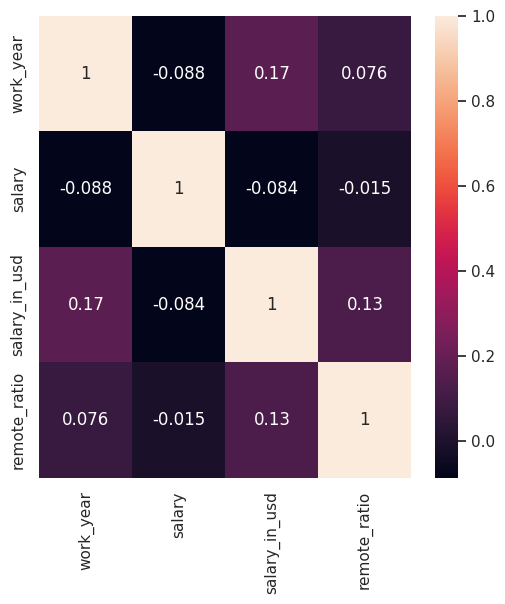

In [15]:
#Visualize Correlations in a heatmap

# plt.figure(figsize=(6,6))
# sns.heatmap(ds_salaries.corr(), annot=True)

#Visualize Correlations in a heatmap

plt.figure(figsize=(6,6))
sns.heatmap(ds_salaries.select_dtypes(include=[np.number]).corr(), annot=True)

### Summary of Findings
* The Dataset contains 607 records and 12 features.
* There are no missing values in the dataset.
* Unnamed column is not useful for our analysis (Dropped column).
* Data contains values from 2020 to 2022 Work Year
* There are 4 unique experience levels with SE occuring 280 times.
* The Dataset contains 4 employment types; FT (Full time employment) is the most common type occurring 588 instances).
* There are 50 unique job titles. 
* Salary is recorded in 17 different currencies.
* The average salary in USD is 112,297.87
* Employees are resident in 57 locations while the Companies are located in 50 locations.
* The US contains the most Data Science professionals and companies with 332 professionals and 355 companies resident in the US.

## 1. Univariate analysis

### 1.1. Categorical variables

### 1.1.1. Experience Level

In [16]:
# Rename Experience level values
ds_salaries.experience_level.replace({'EN':'Entry-Level/Junior','MI':'Mid-level/Intermediate','SE':'Senior-level/Expert','EX':'Executive-level/Director'}, inplace=True)

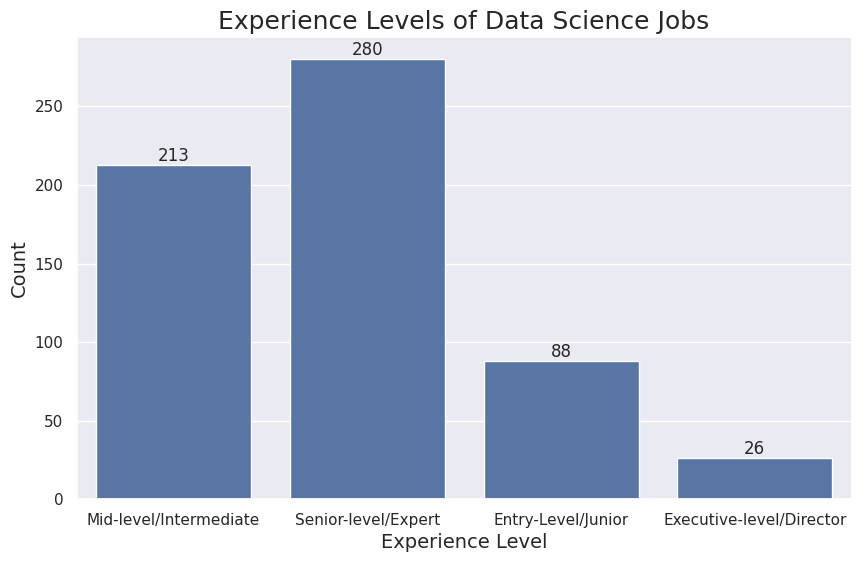

In [17]:
plt.figure(figsize=(10,6))
plt.title('Experience Levels of Data Science Jobs', fontsize=18)
ax = sns.countplot (x='experience_level', data=ds_salaries)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()
    

In [19]:
experience_ratio = ds_salaries.experience_level.value_counts(normalize=True)
display(experience_ratio)

experience_level
Senior-level/Expert         0.461285
Mid-level/Intermediate      0.350906
Entry-Level/Junior          0.144975
Executive-level/Director    0.042834
Name: proportion, dtype: float64

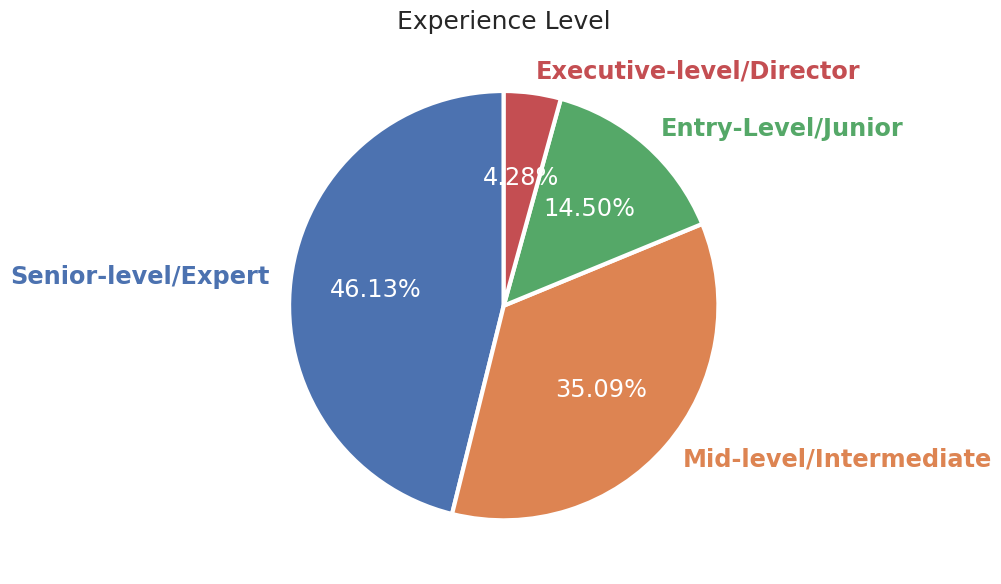

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
x=experience_ratio

labels = ['Senior-level/Expert','Mid-level/Intermediate','Entry-Level/Junior','Executive-level/Director']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Experience Level', fontsize=18)
plt.tight_layout()

***A large percentage of Data Science Professionals occupy Senior-level/Expert as well as Mid-level/Intermediate positions. However, Executive-level/Directors in Data Science are few; accounting for only 4.28% of the dataset.***

### 1.1.2. Job Titles

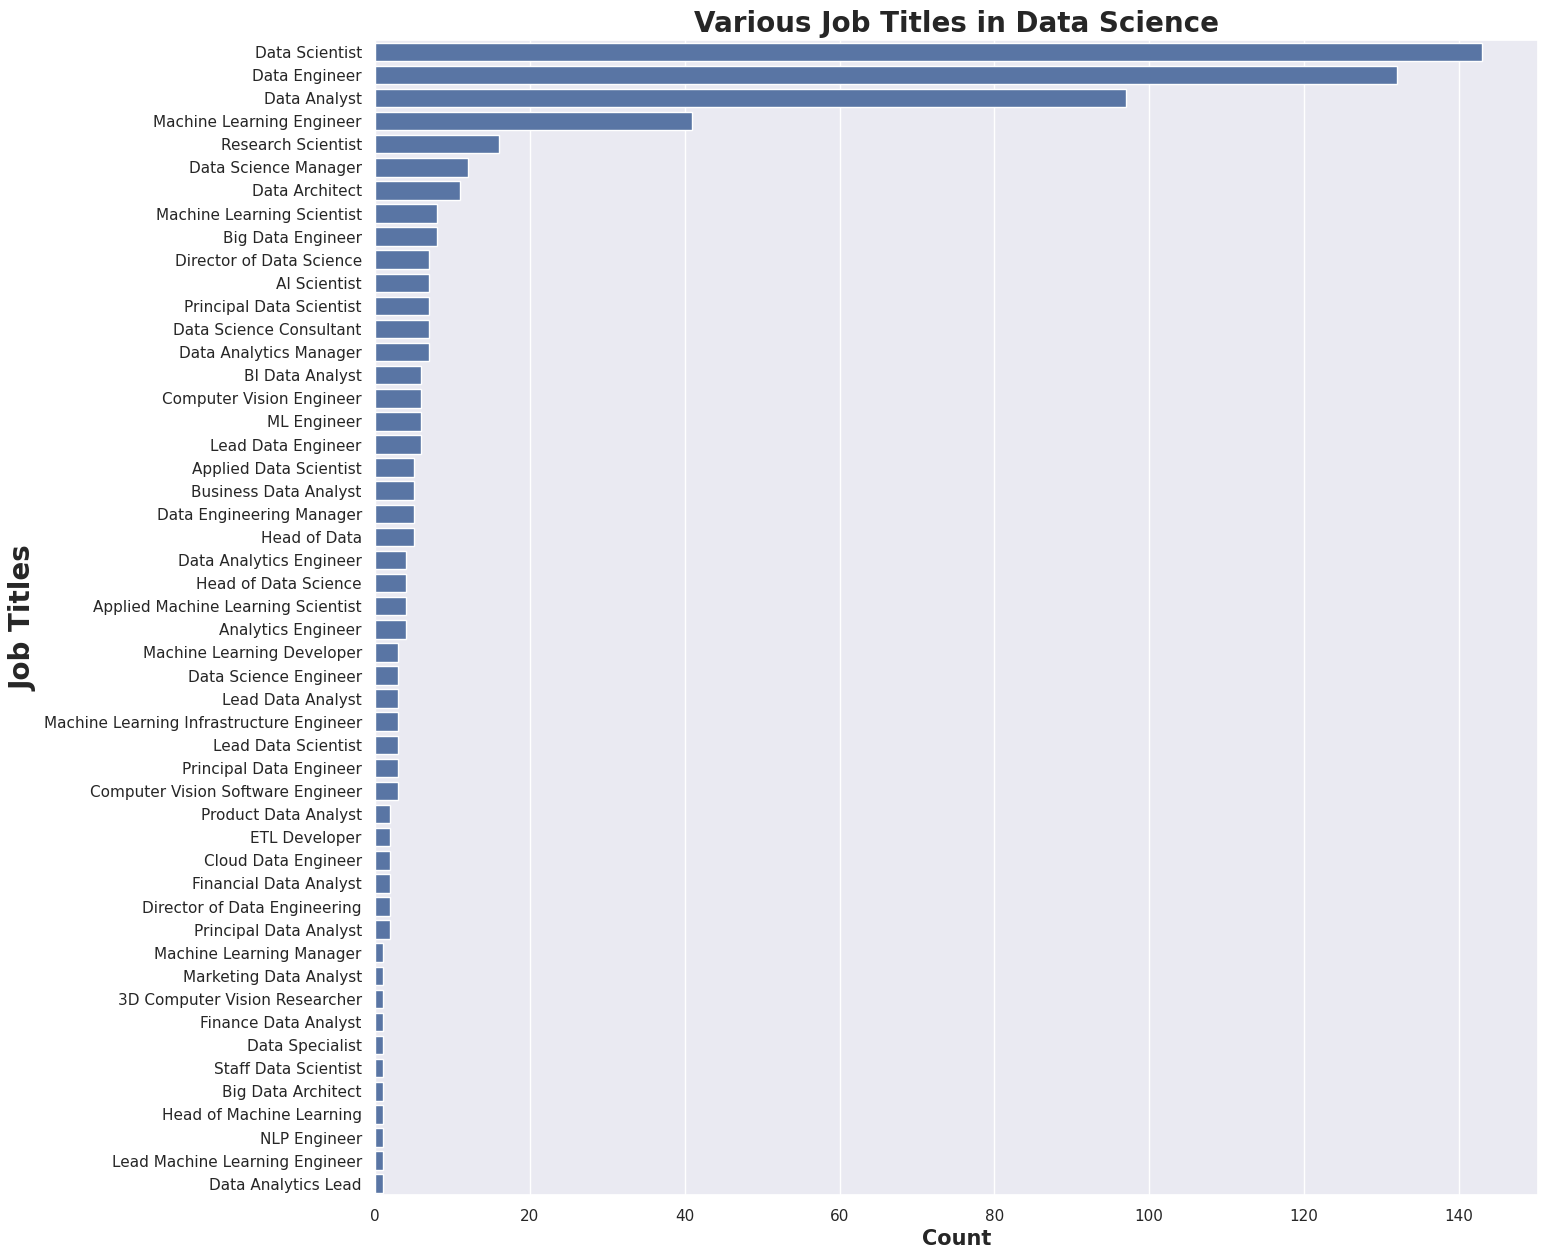

In [21]:
plt.figure(figsize=(15,15))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.countplot(y='job_title', data=ds_salaries, order=ds_salaries['job_title'].value_counts().index)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=20, fontweight='bold')
plt.show()

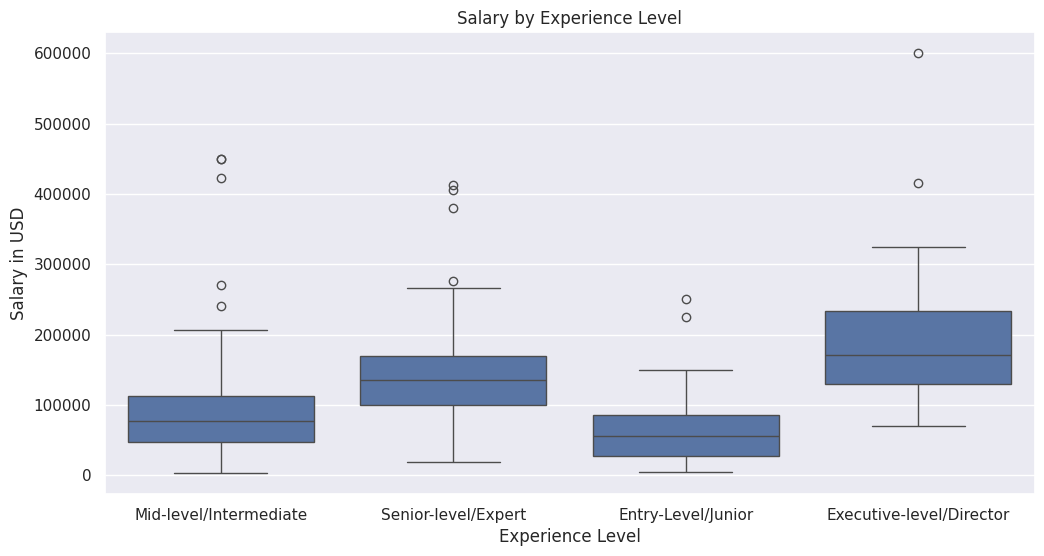

In [25]:
# Boxplot for salaries by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=ds_salaries)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


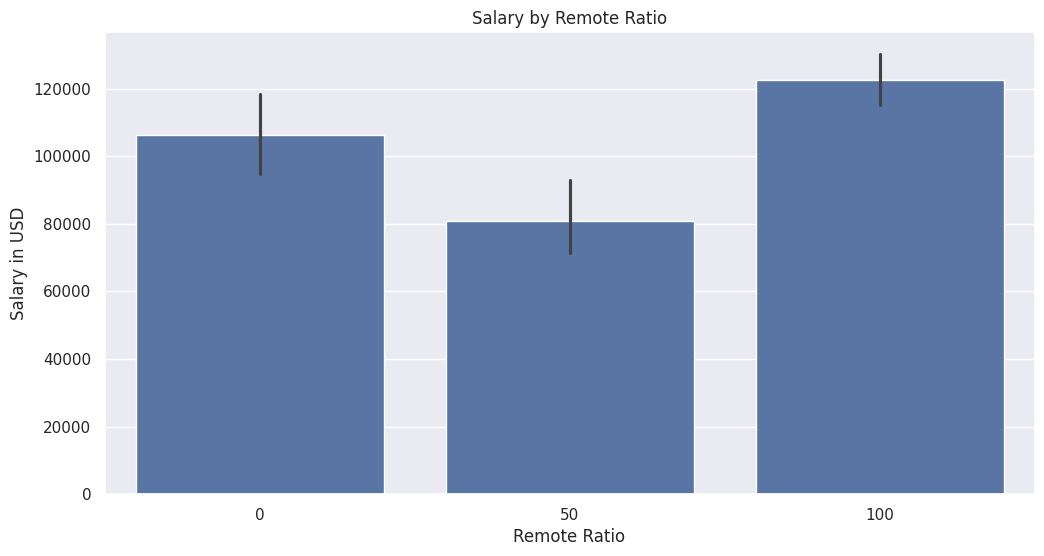

In [27]:
# Remote ratio vs salary
plt.figure(figsize=(12, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=ds_salaries)
plt.title('Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()


***The top 4 job titles include Data Scientist, Data Engineer, Data Analyst and Machine Learning Engineer. Other job titles have less than 20 people in the respective positions/titles.***

### 1.1.3 Employment Type

In [28]:
# Rename Employment Type values
ds_salaries.employment_type.replace({'PT':'Part-time','FT':'Full-time','CT':'Contract','FL':'Freelance'}, inplace=True)

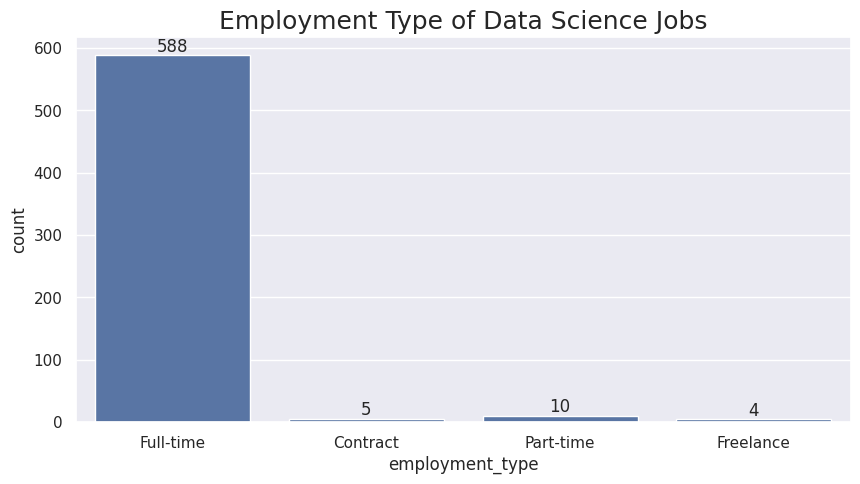

In [29]:
plt.figure(figsize=(10,5))
plt.title('Employment Type of Data Science Jobs', fontsize=18)
ax = sns.countplot (x='employment_type', data=ds_salaries)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [30]:
emp_type_ratio = ds_salaries.employment_type.value_counts(normalize=True)
display(emp_type_ratio)

employment_type
Full-time    0.968699
Part-time    0.016474
Contract     0.008237
Freelance    0.006590
Name: proportion, dtype: float64

***Full time employment is the most common employment type covering 96.9% of the dataset and the other 3 employment types are a total of 3%. Freelance is the least with only 4 records.***

### 1.1.4. Employee Residence & Company Location

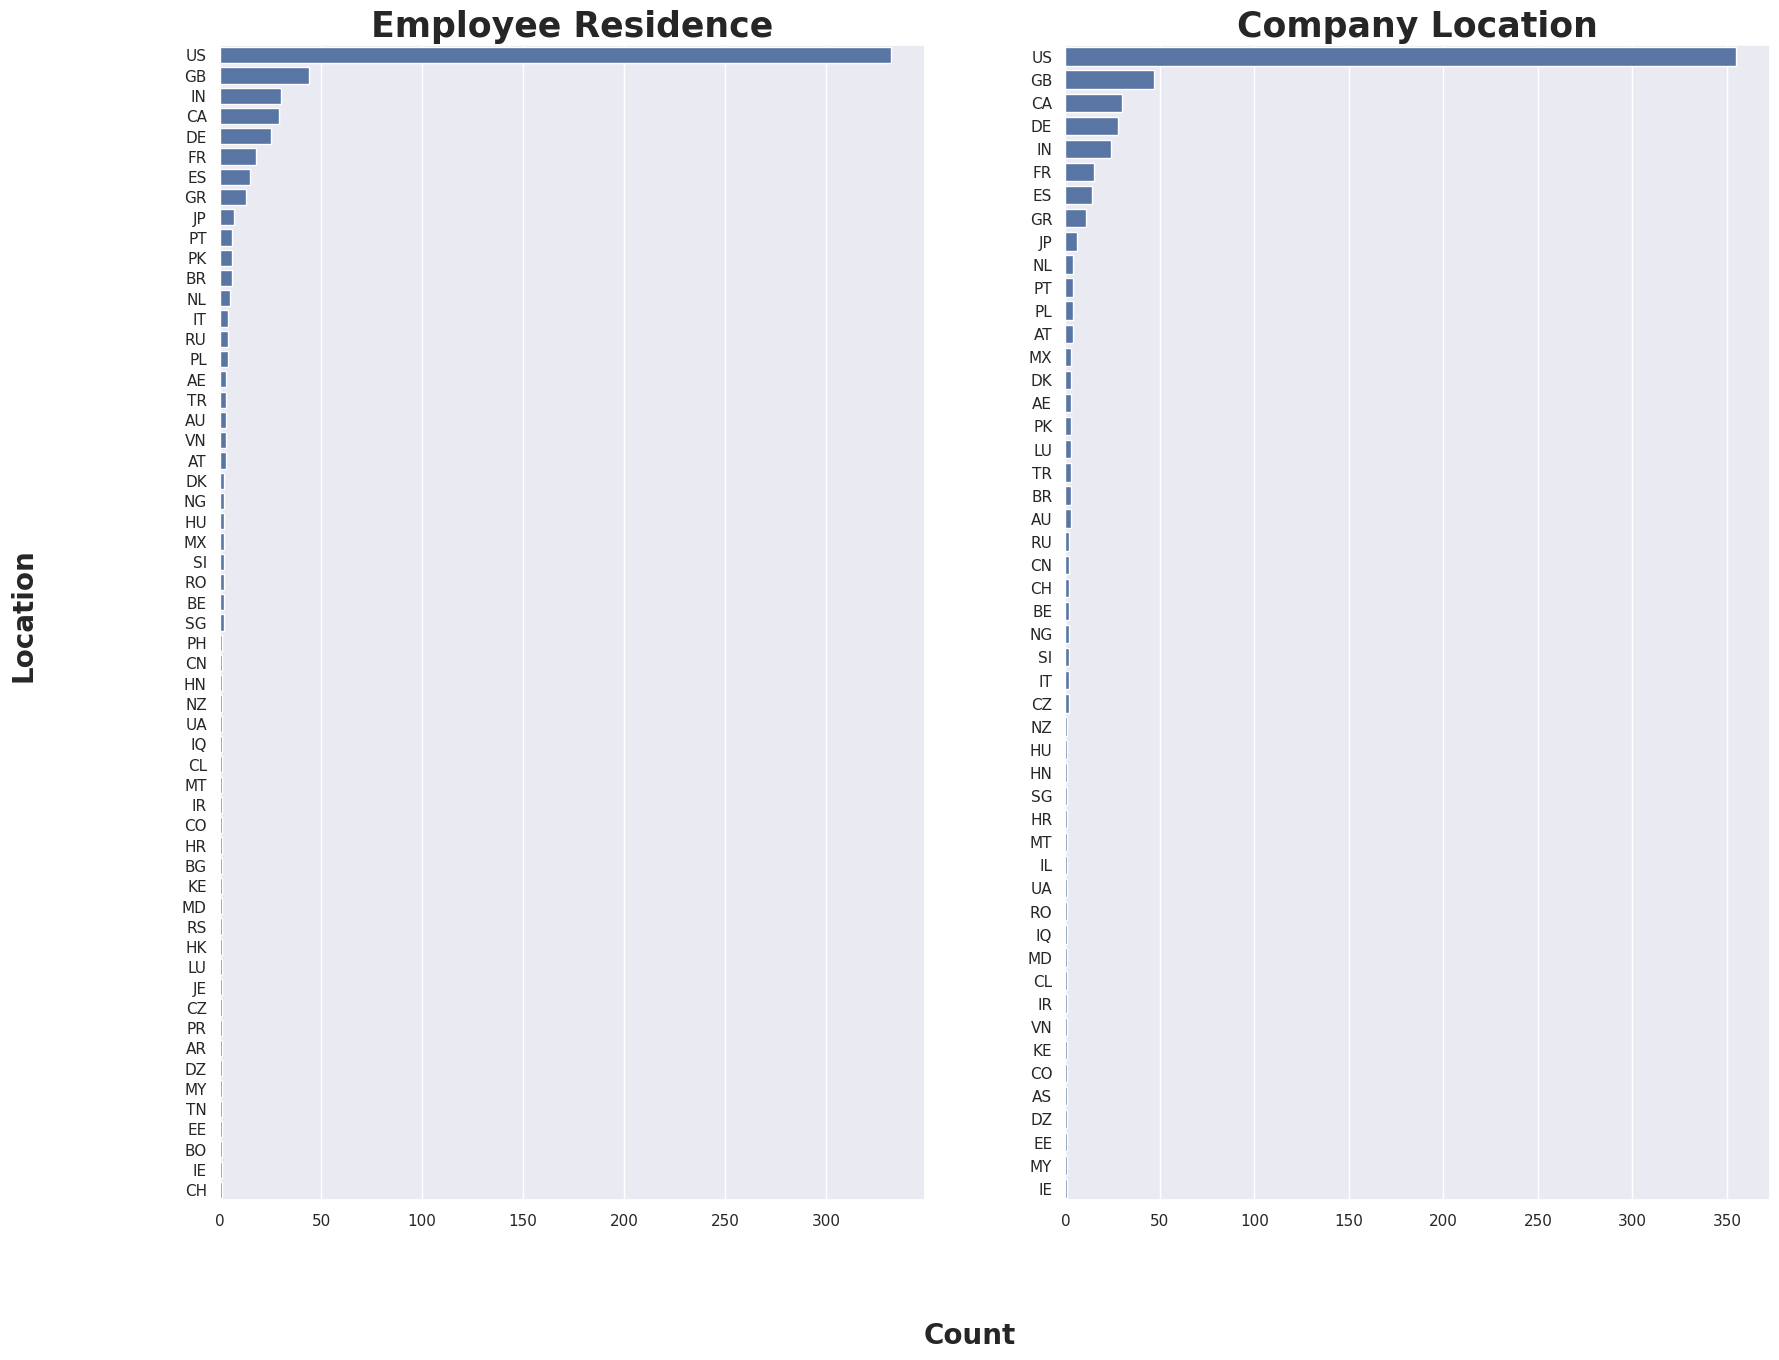

In [31]:
fig,axes=plt.subplots(1,2,figsize=(20,15))
sns.countplot(ax=axes[0],y='employee_residence', data=ds_salaries, order=ds_salaries['employee_residence'].value_counts().index)
sns.countplot(ax=axes[1],y='company_location', data=ds_salaries,  order=ds_salaries['company_location'].value_counts().index)

axes[0].set_title('Employee Residence', fontsize=25, fontweight='bold')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set_title('Company Location', fontsize=25, fontweight='bold')
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

fig.supxlabel('Count', fontsize=20, fontweight='bold')
fig.supylabel('Location', fontsize=20, fontweight='bold')

plt.show()

***For Employee Residence and Company location, the US is the highest in terms of frequency, followed by Great Britain. A total of over 300 Employees and Companies are resident in the US while other locations record values below 50 for both Employee residence and company location.***

### 1.1.5. Company Size

In [32]:
# Rename Company Size
ds_salaries.company_size.replace({'S':'Small(<50)','M':'Medium(50-250)','L':'Large(>250)'}, inplace=True)

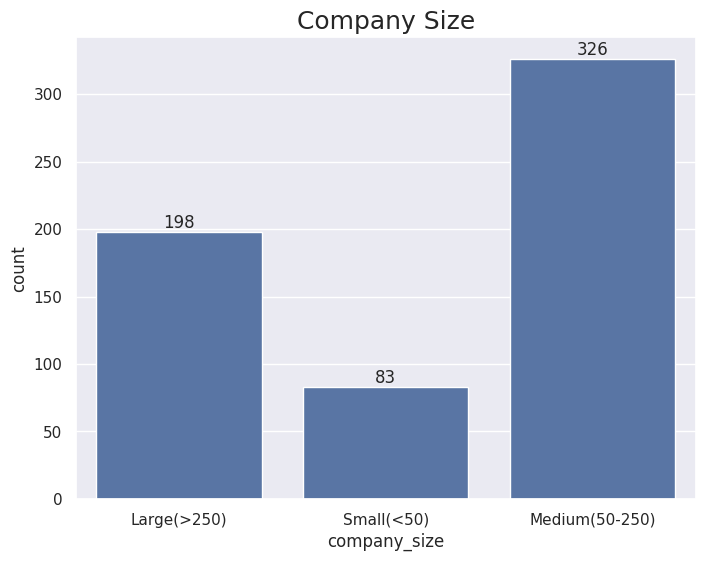

In [33]:
plt.figure(figsize=(8,6))
plt.title('Company Size', fontsize=18)
ax = sns.countplot (x='company_size', data=ds_salaries)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [34]:
size_ratio = ds_salaries.company_size.value_counts(normalize=True)
display(size_ratio)

company_size
Medium(50-250)    0.537068
Large(>250)       0.326194
Small(<50)        0.136738
Name: proportion, dtype: float64

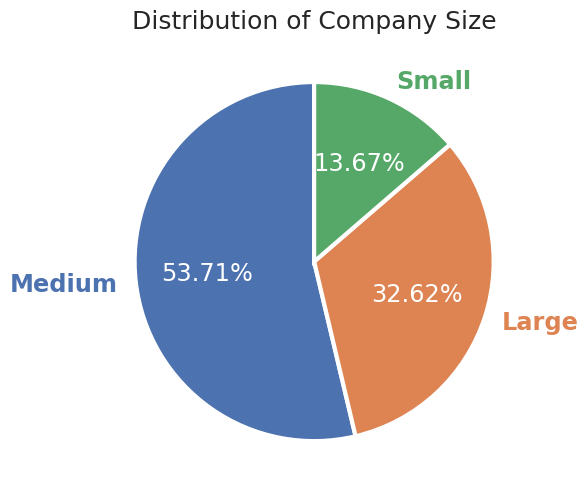

In [35]:
fig, ax = plt.subplots(figsize=(6, 6))
x=size_ratio
labels = ['Medium','Large','Small']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Distribution of Company Size', fontsize=18)
plt.tight_layout()

***Most companies with Data Science Professionals are Medium Sized companies. Small companies have the least number of Data Science jobs.***

## 1.2. Numeric variables

### 1.2.1. Work Year

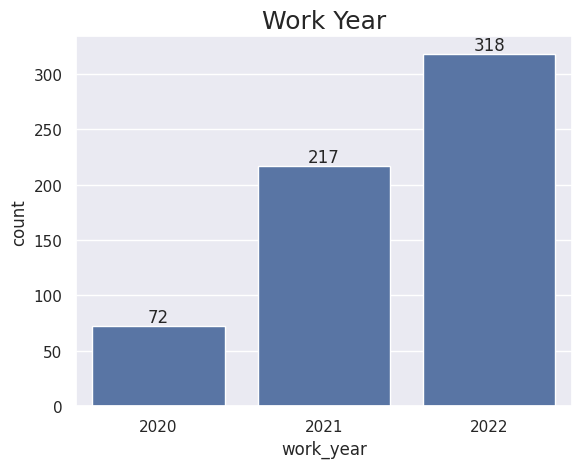

In [36]:
plt.title ('Work Year', fontsize=18)
ax = sns.countplot(x='work_year', data=ds_salaries)
for i in ax.containers:
    ax.bar_label(i)

In [37]:
year_ratio = ds_salaries.work_year.value_counts(normalize=True)
display(year_ratio)

work_year
2022    0.523888
2021    0.357496
2020    0.118616
Name: proportion, dtype: float64

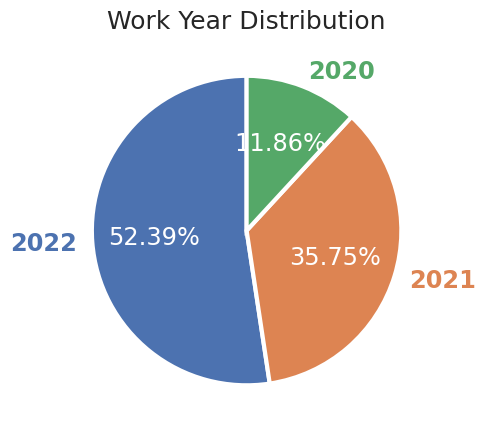

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
x = year_ratio
labels = ['2022','2021','2020']


patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Work Year Distribution', fontsize=18)
plt.tight_layout()


***The Dataset contains values from 2020 - 2022 with 2022 records accounting for 52.39% and 2020 being 11.9%***

### 1.2.2. Salary in USD

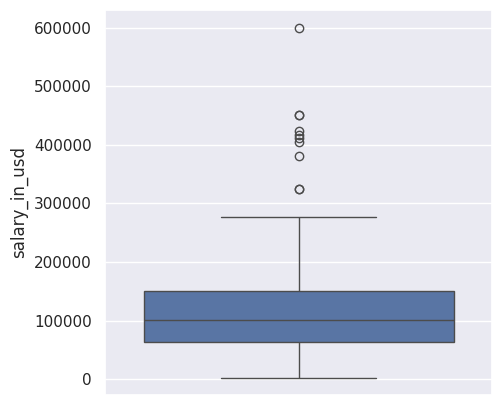

In [39]:
plt.figure(figsize=(5,5))
sns.boxplot(y='salary_in_usd', data=ds_salaries)
plt.show()

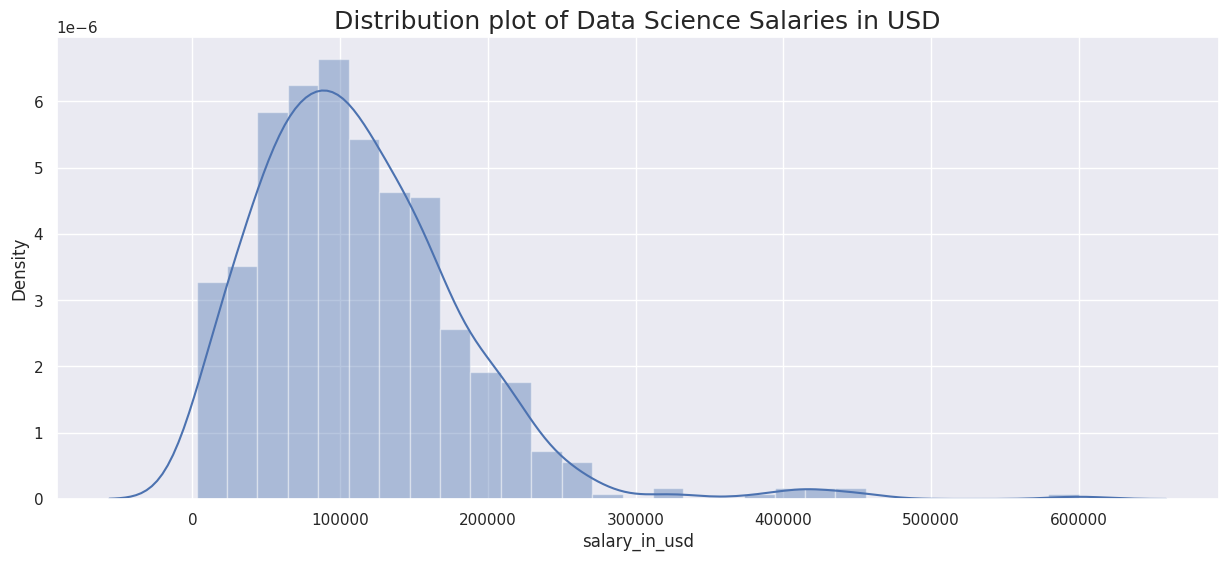

In [40]:
plt.figure(figsize=(15,6))
sns.distplot(ds_salaries['salary_in_usd'])
plt.title('Distribution plot of Data Science Salaries in USD', fontsize=18)
plt.show()

### 1.2.3. Remote Ratio

In [41]:
# Rename Employment Type values
ds_salaries.remote_ratio.replace({0:'No remote work',50:'Partially remote',100:'Fully remote'}, inplace=True)

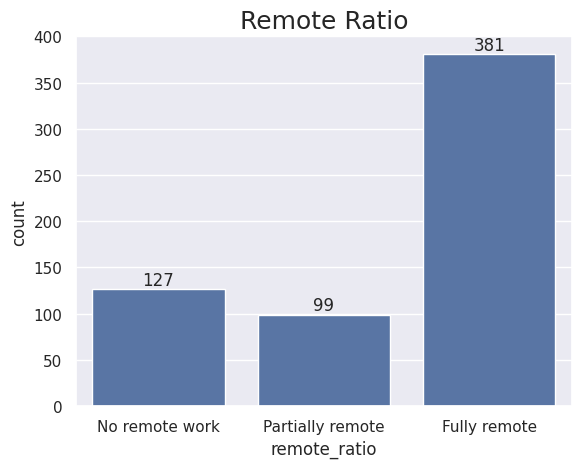

In [42]:
plt.title ('Remote Ratio', fontsize=18)
ax = sns.countplot(x='remote_ratio', data=ds_salaries)
for i in ax.containers:
    ax.bar_label(i)

In [43]:
remote_work_ratio = ds_salaries.remote_ratio.value_counts(normalize=True)
display(remote_work_ratio)

remote_ratio
Fully remote        0.627677
No remote work      0.209226
Partially remote    0.163097
Name: proportion, dtype: float64

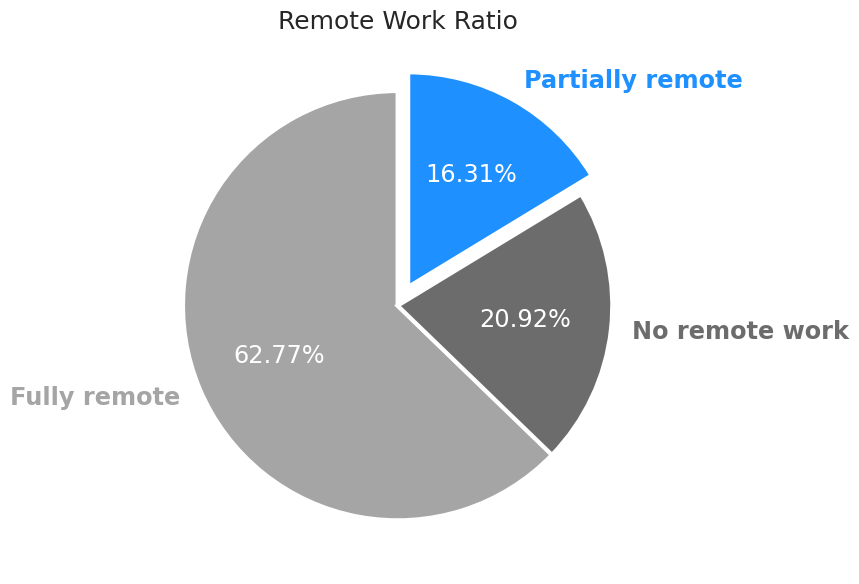

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

x=remote_work_ratio

cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45,0.85, len(x))))

colors[2]='dodgerblue'
labels = ['Fully remote','No remote work','Partially remote']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the wedge to highlight it.
    explode=(0, 0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Remote Work Ratio', fontsize=18)
plt.tight_layout()

## 2. Work Year Analysis

### 2.1 Remote ratio by work year

<Axes: xlabel='remote_ratio', ylabel='work_year'>

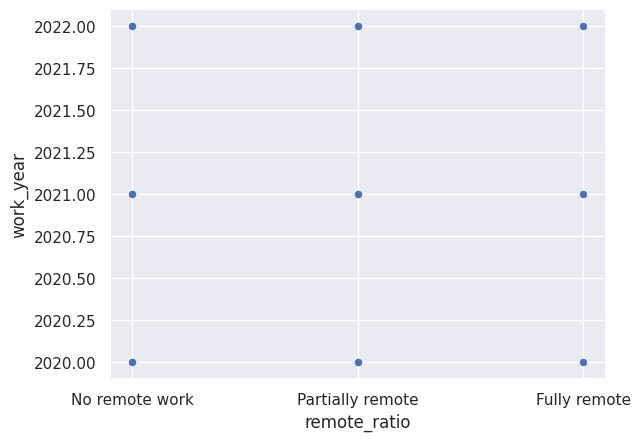

In [45]:
sns.scatterplot(x='remote_ratio', y='work_year', data=ds_salaries)

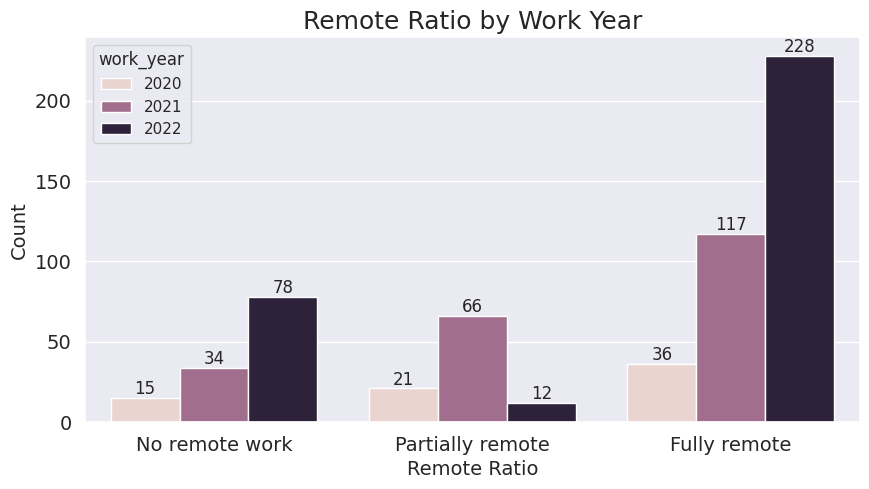

In [46]:
plt.figure(figsize=(10,5))
plt.title("Remote Ratio by Work Year", fontsize=18)
ax = sns.countplot(x='remote_ratio', data=ds_salaries, hue = 'work_year')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Remote Ratio", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 3. Experience Level Analysis

### 3.1. Employment Type by Experience Level

In [47]:
type_level_pivot = pd.crosstab(ds_salaries['employment_type'],ds_salaries['experience_level'])
display(type_level_pivot)

experience_level,Entry-Level/Junior,Executive-level/Director,Mid-level/Intermediate,Senior-level/Expert
employment_type,,,,
Contract,2,1,1,1
Freelance,0,0,3,1
Full-time,79,25,206,278
Part-time,7,0,3,0


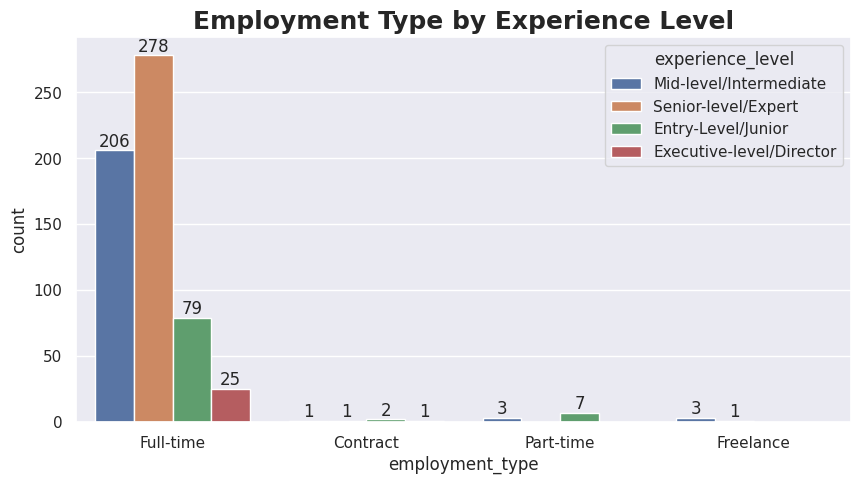

In [48]:
plt.figure(figsize=(10,5))
plt.title('Employment Type by Experience Level', fontsize=18, weight='bold')
ax=sns.countplot(x='employment_type', data=ds_salaries, hue = 'experience_level')
for i in ax.containers:
    ax.bar_label(i)

### 3.2. Top 3 Job Title by Experience Level


In [49]:
top_titles = ds_salaries['job_title'].value_counts()[:3]
top_titles

job_title
Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: count, dtype: int64

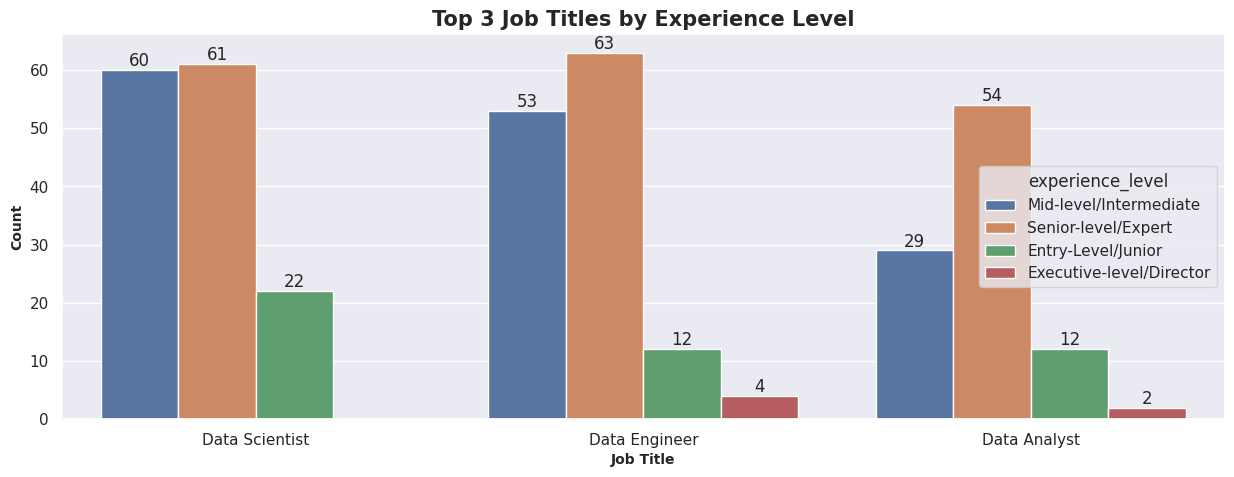

In [50]:
plt.figure(figsize=(15,5))
plt.title('Top 3 Job Titles by Experience Level', fontsize=15, fontweight='bold')
ax=sns.countplot(x='job_title', hue='experience_level', data=ds_salaries, 
              order=ds_salaries['job_title'].value_counts().iloc[:3].index)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Job Title', fontsize=10, fontweight='bold')
plt.show()

### 3.3. Company Size by Experience Level

In [51]:
size_level_pivot = pd.crosstab(ds_salaries['company_size'],ds_salaries['experience_level'])
display(size_level_pivot)

experience_level,Entry-Level/Junior,Executive-level/Director,Mid-level/Intermediate,Senior-level/Expert
company_size,,,,
Large(>250),29,11,86,72
Medium(50-250),30,12,98,186
Small(<50),29,3,29,22


<Figure size 1000x500 with 0 Axes>

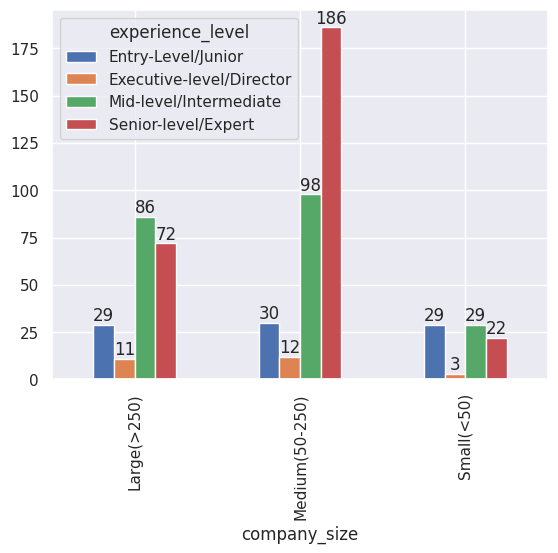

In [52]:
plt.figure(figsize=(10,5))
ax=size_level_pivot.plot.bar()
for i in ax.containers:
    ax.bar_label(i)

***Medium-Sized companies hire more Data professionals in every experience level although there are significantly more Senior-level/Expert employees compared to other levels.***

## 4. Company Location Analysis

### 4.1. Experience Level

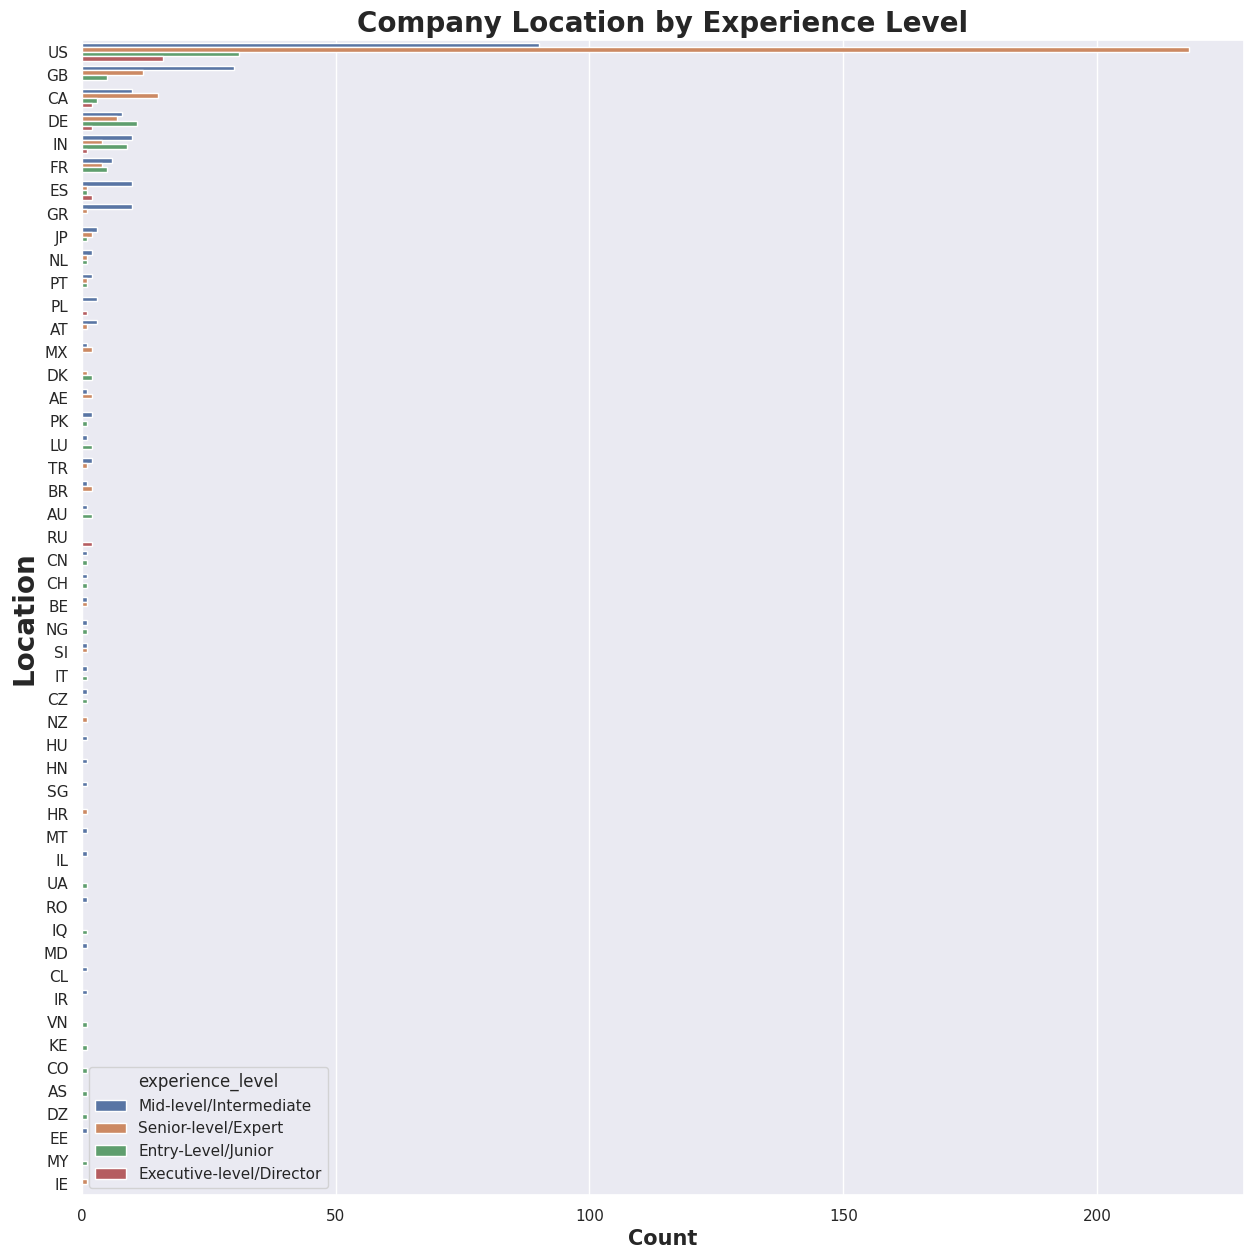

In [53]:
plt.figure(figsize=(15,15))
plt.title('Company Location by Experience Level', fontsize=20, fontweight='bold')
sns.countplot(y='company_location', hue='experience_level', data=ds_salaries, order=ds_salaries['company_location'].value_counts().index)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Location', fontsize=20, fontweight='bold')
plt.show()


## 5. Salary Analysis

### 5.1. Salary by work year


<Axes: xlabel='work_year', ylabel='salary_in_usd'>

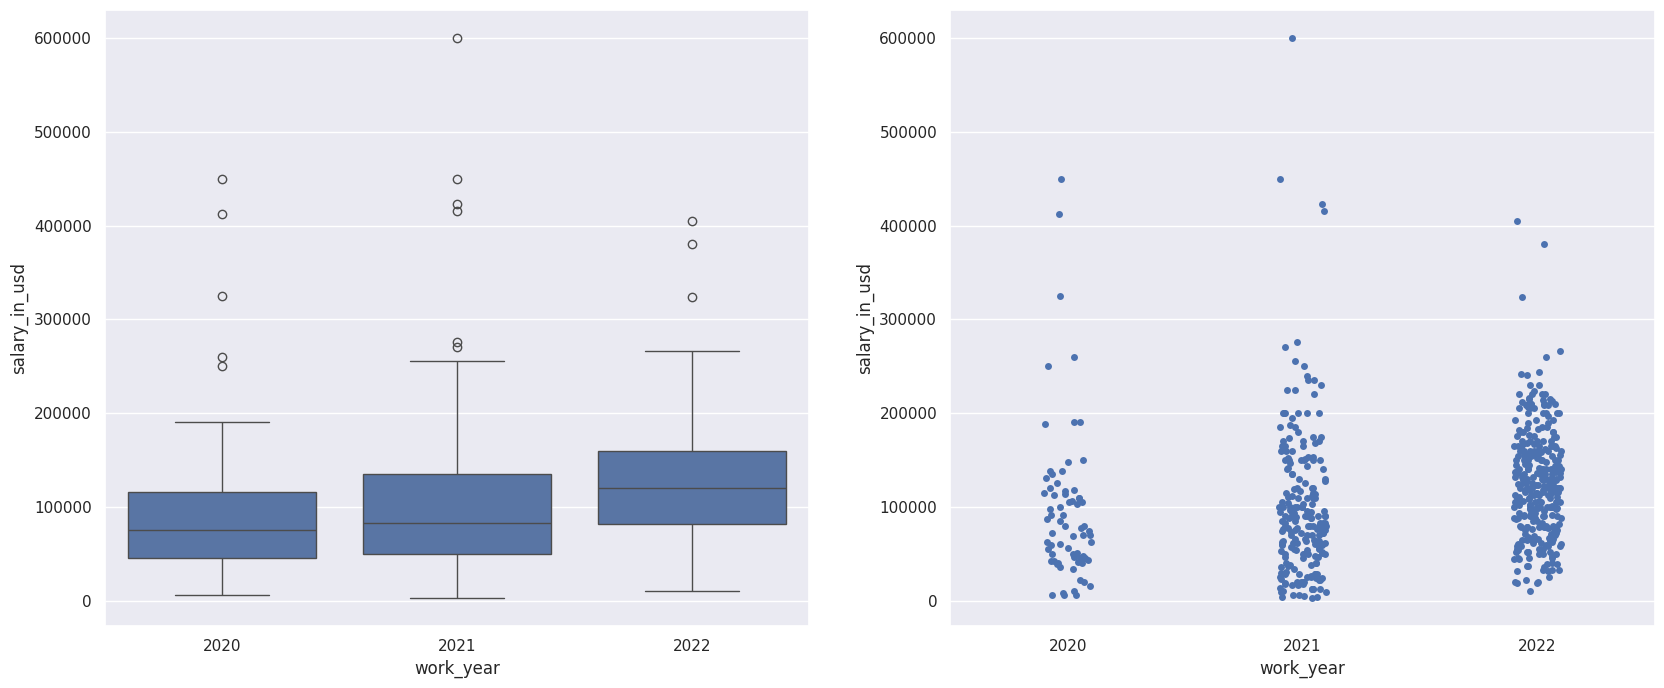

In [54]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='work_year',y='salary_in_usd', data=ds_salaries)
sns.stripplot(ax=axes[1],x='work_year',y='salary_in_usd', data=ds_salaries)


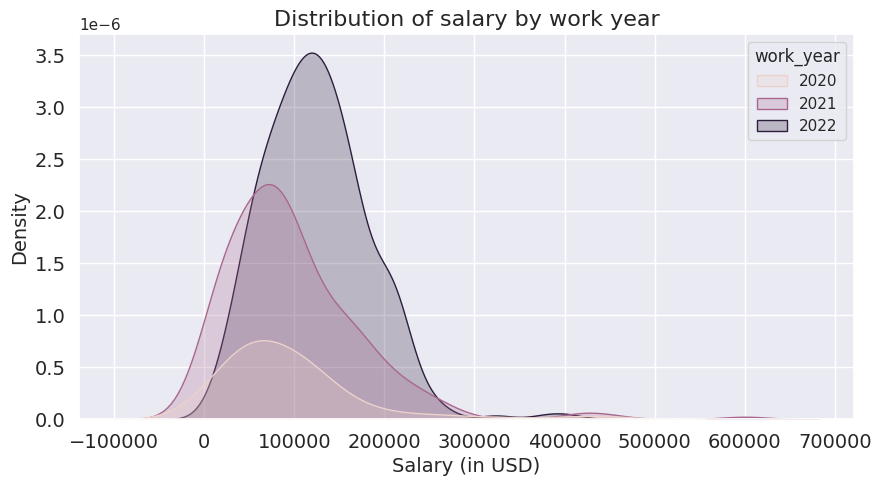

In [55]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds_salaries, x='salary_in_usd', hue='work_year', fill=True)
plt.title("Distribution of salary by work year", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

***The density plot shows an increase in the number of Data Science jobs and salary for each year.***

### 5.2. Salary by Experience Level

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

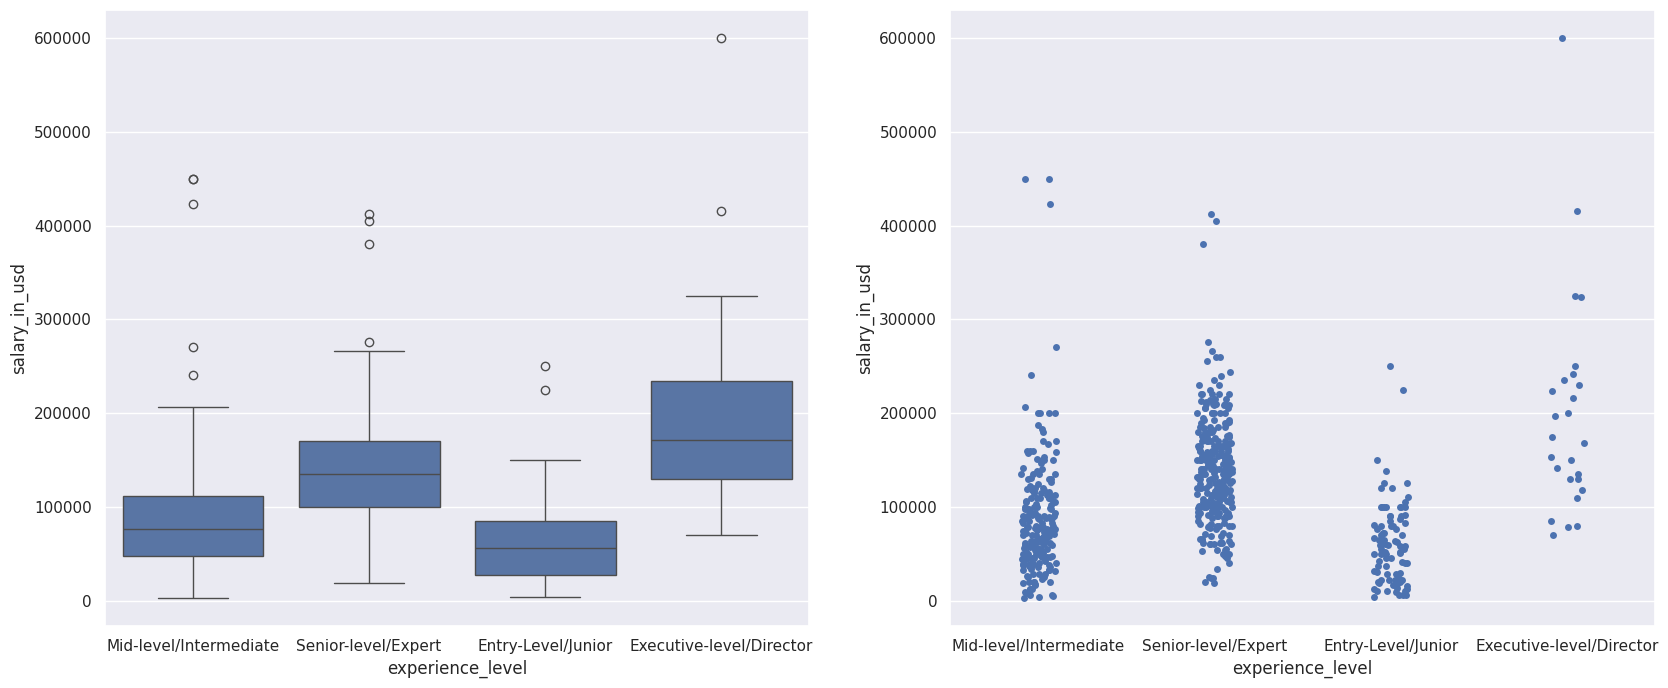

In [56]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='experience_level',y='salary_in_usd', data=ds_salaries)
sns.stripplot(ax=axes[1],x='experience_level',y='salary_in_usd', data=ds_salaries)


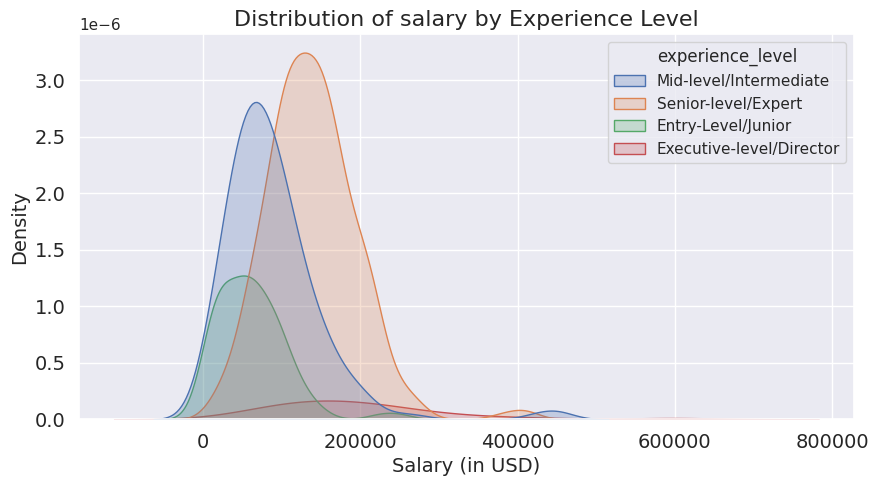

In [57]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds_salaries, x='salary_in_usd', hue='experience_level', fill=True)
plt.title("Distribution of salary by Experience Level", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

***The average salary is higher for a higher experience level. Executive-level/Directors are paid the highest salaries of all the experience levels on average, and Entry-level are the least earners.***

### 5.3. Salary by Company Size

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

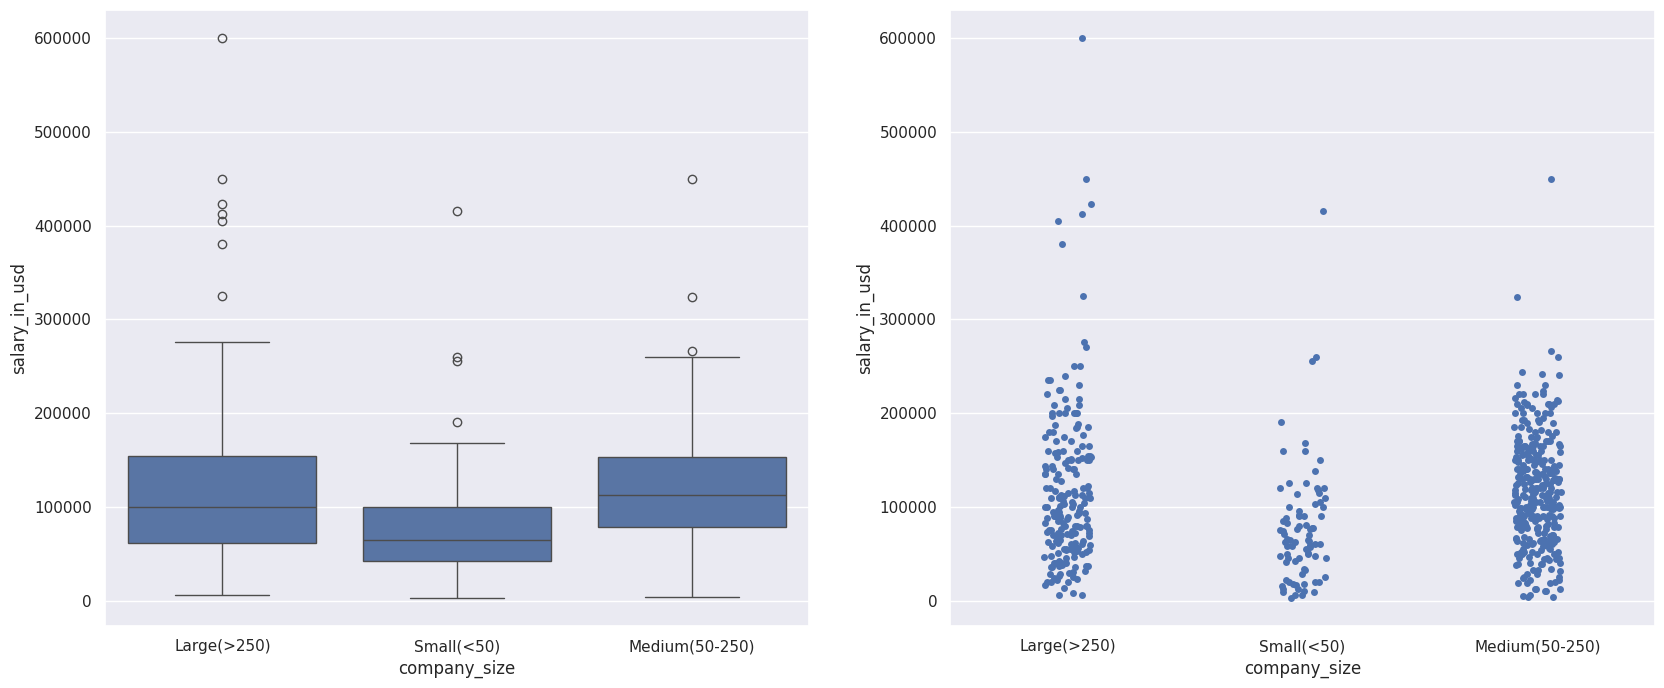

In [58]:
fig,axes=plt.subplots(1,2,figsize=(20,8))

sns.boxplot(ax=axes[0],x='company_size',y='salary_in_usd', data=ds_salaries)
sns.stripplot(ax=axes[1],x='company_size',y='salary_in_usd', data=ds_salaries)

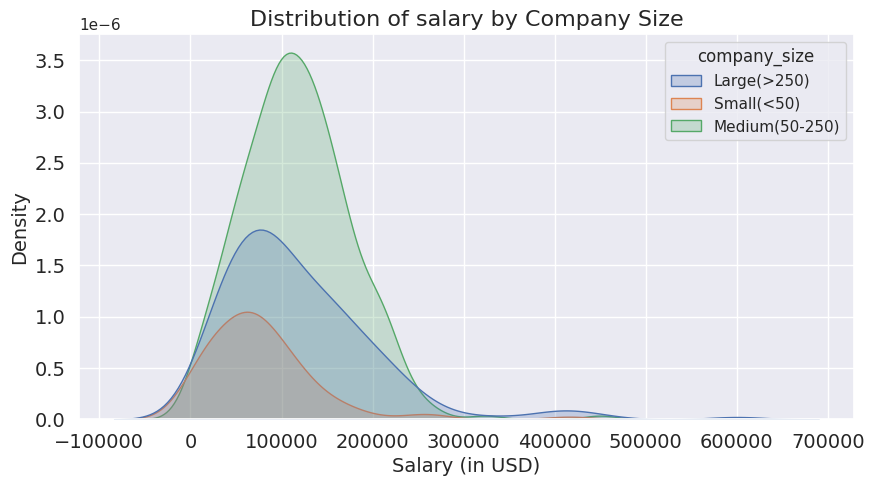

In [59]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=ds_salaries, x='salary_in_usd', hue='company_size', fill=True)
plt.title("Distribution of salary by Company Size", fontsize=16)
plt.xlabel("Salary (in USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

***Medium and Large-sized companies have higher pay in comparison to small sized companies***

### 5.4. Highest salaries by job title


In [60]:
title_sal_pivot = pd.pivot_table(data=ds_salaries,index=['job_title'],values=['salary_in_usd'], aggfunc='max').sort_values(by=['salary_in_usd'],ascending=False)
display(title_sal_pivot)

,salary_in_usd
job_title,
Principal Data Engineer,600000
Financial Data Analyst,450000
Research Scientist,450000
Applied Machine Learning Scientist,423000
Principal Data Scientist,416000
Data Scientist,412000
Data Analytics Lead,405000
Applied Data Scientist,380000
Director of Data Science,325000


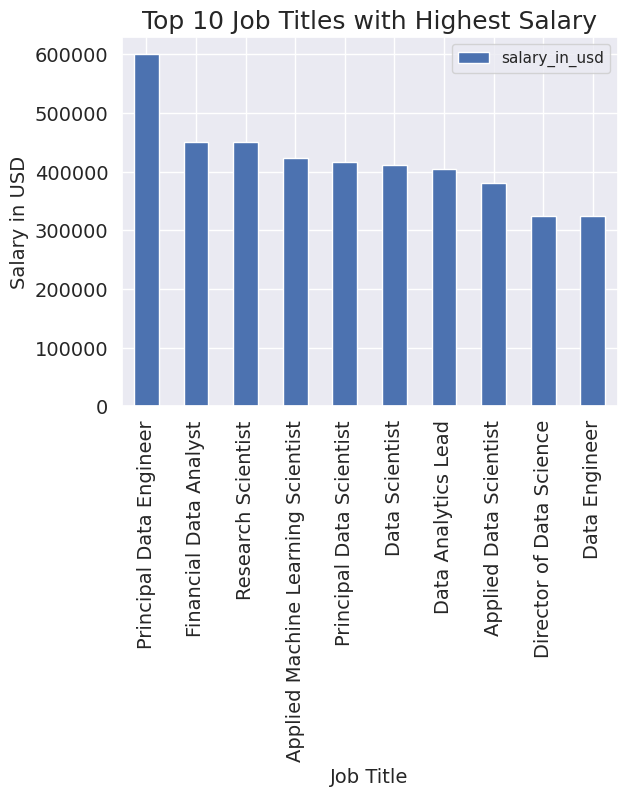

In [61]:
title_sal_pivot.head(10).plot.bar()
plt.title('Top 10 Job Titles with Highest Salary', fontsize=18)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

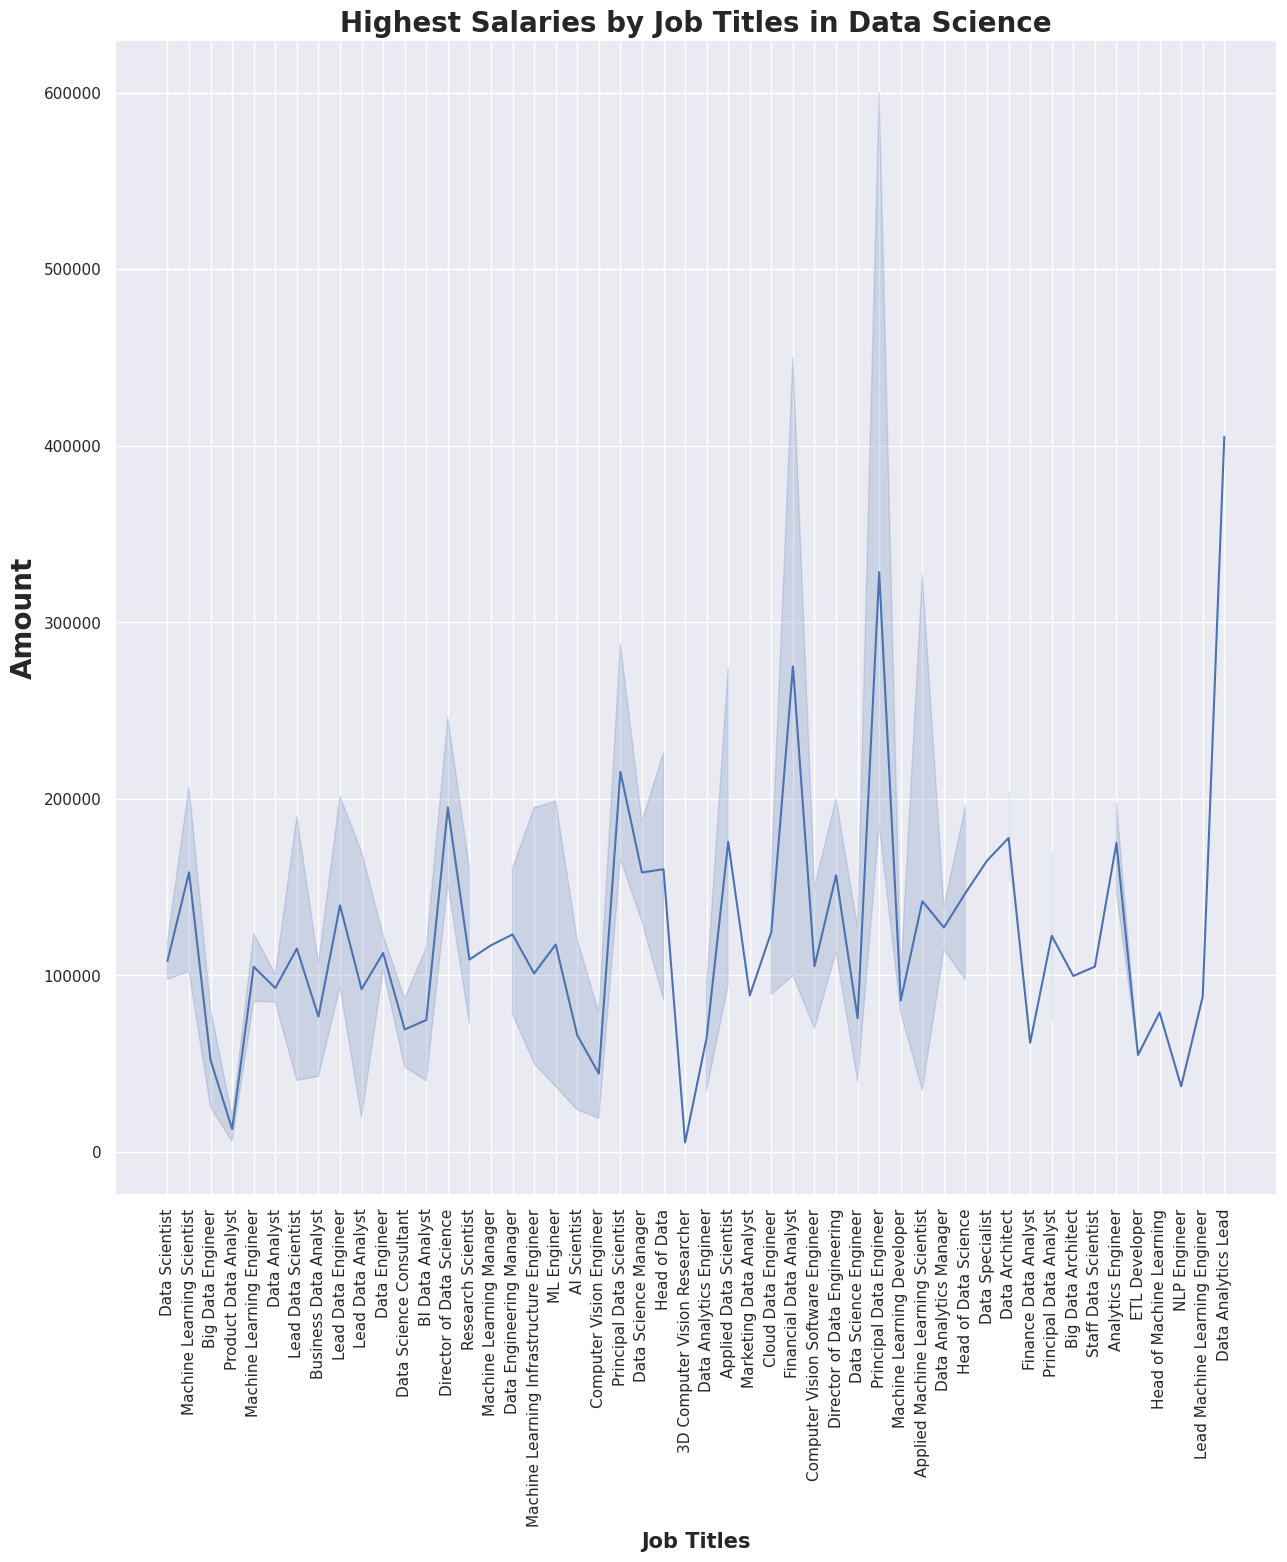

In [62]:
plt.figure(figsize=(15,15))
plt.title('Highest Salaries by Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='job_title', data=ds_salaries)
plt.xlabel('Job Titles', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

### 5.5. Average Salary by Company Location

In [63]:
loc_sal_pivot = pd.pivot_table(data=ds_salaries,index=['company_location'],values=['salary_in_usd'], aggfunc='mean').sort_values(by=['salary_in_usd'],ascending=False)
display(loc_sal_pivot)

,salary_in_usd
company_location,
RU,157500.000000
US,144055.261972
NZ,125000.000000
IL,119059.000000
JP,114127.333333
AU,108042.666667
DZ,100000.000000
AE,100000.000000
IQ,100000.000000


<Axes: ylabel='company_location'>

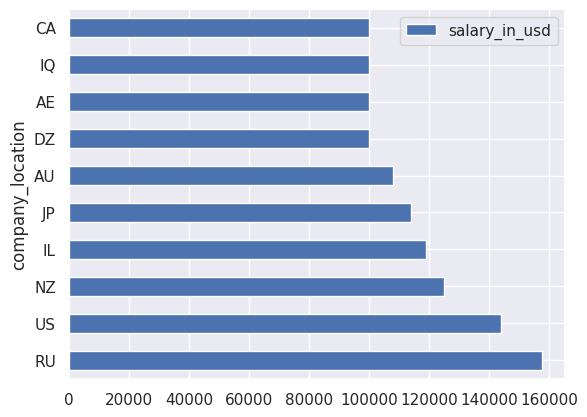

In [64]:
loc_sal_pivot.head(10).plot.barh()

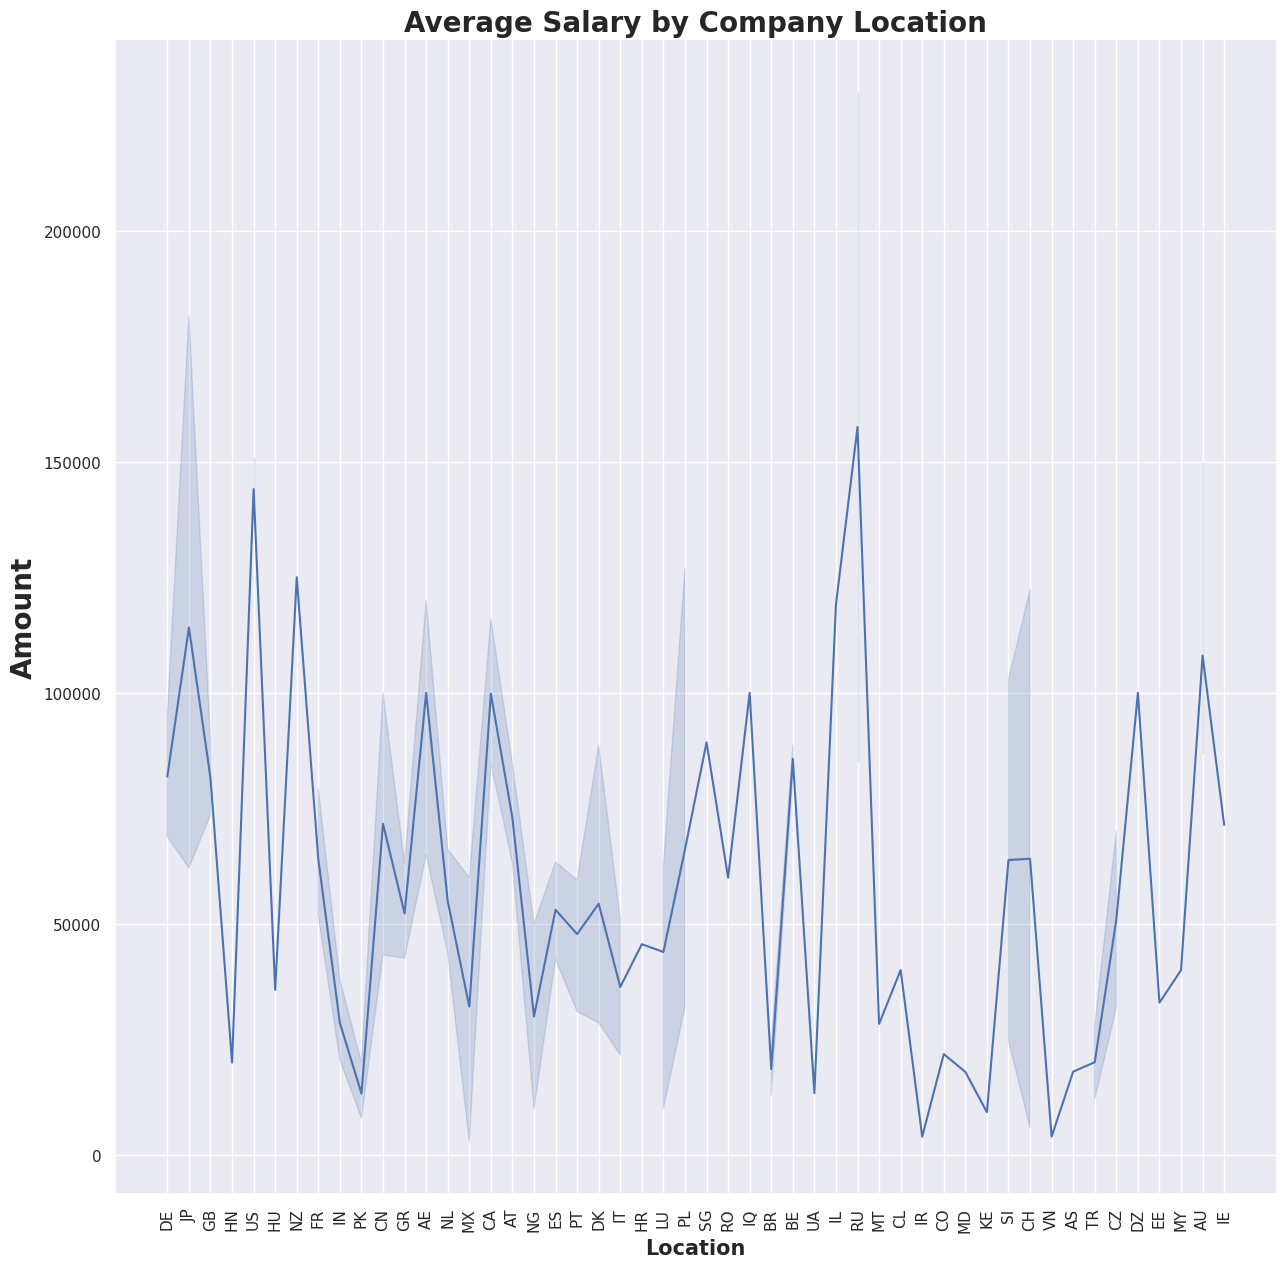

In [65]:
plt.figure(figsize=(15,15))
plt.title('Average Salary by Company Location', fontsize=20, fontweight='bold')
sns.lineplot(y='salary_in_usd', x='company_location', data=ds_salaries)
plt.xlabel('Location', fontsize=15, fontweight='bold')
plt.ylabel('Amount', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [66]:
# Financial Modeling

# Predict Salary Using Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Select features and target
features = ['experience_level', 'employment_type',
'remote_ratio', 'company_size']
target = 'salary_in_usd'








In [70]:
# 1. Train a model to predict salary_in_usd based on features like
# experience_level, job_title, etc.

# 2. Split data into training and testing sets.


# Encode all categorical columns for model
categorical_features = ['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'job_title']
data = pd.get_dummies(ds_salaries, columns=categorical_features, drop_first=True)

X = data.drop(columns=['salary_in_usd', 'work_year', 'employee_residence', 'salary', 'salary_currency', 'company_location'])
y = data['salary_in_usd']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 3411701973.8930387
Mean Absolute Error: 41997.08705138497


## Summary
* Most Data Science jobs require Senior-level/Expert experience level and very few positions are available for Executive-level/Directors.
* The most common job titles in the Data Science field are Data Scientist, Data Engineer, Data Analyst and Machine Learning Engineer.
* Most positions are Full-time employment.
* Most Data Science employees and Companies are resident in the United States. However, the location where the highest average salary is paid is Russia; followed closely by the United States.
* The Number of Data Science jobs and the salary are increasing with each year and experience-level.
* Medium-sized and Large-sized companies pay high salaries in comparison to small-sized companies.
* The average salary for Data Science Jobs in USD is 112,297.87.

#### It is important to note that the insights are based on a sample of 607 participants and may not be representative of the entire population of data science professionals.